# Canny Edge Detection Algorithm 

The algorithm consist of 5 steps:
  1. Noise reduction
  2. Gradient calculation
  3. Non-maximun suppression
  4. Double threshold 
  5. Edge tracking by Hystersis
  
 https://towardsdatascience.com/canny-edge-detection-step-by-step-in-python-computer-vision-b49c3a2d8123
 
 http://justin-liang.com/tutorials/canny/
 
 https://www.youtube.com/watch?v=p3Ph9rE6v7Y&ab_channel=UsmanSheikh

#### NOTE: Edge detection results are highly sensitive to image noise

- Steps to get rid of the noise is apply gaussian blur to smooth it. 
- To do so, image convolution technique is applied with gaussian kernel (3x3, 5x5, ...).
- Size of the kernel depends on the expected blurring effect. Basically, smallest kernel size shows less visible blur.

$$H_{ij} = $$

**Different ways to load data**

In [ ]:
# Ways to download IMAGE -- observe the difference
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


myImage = Image.open("mango.jpg")
#plt.imshow(myImage)
print(type(myImage))

myImage1 = mpimg.imread("mango.jpg")
plt.imshow(myImage1)
plt.show()
print(type(myImage1))
print(myImage1.shape)


In [ ]:
# Alternative way ----- rgb2gray
from skimage import io

GrayImg = io.imread('mango.jpg', as_gray=True)
#print(GrayImg)
plt.imshow(GrayImg)
plt.show()
print(GrayImg.shape)
print(type(GrayImg))

**How to Preprocess:**

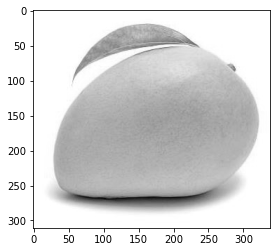

<class 'numpy.ndarray'>
(311, 338)


In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load and Pre-processing step -1 color image to converted to gray scale image using open cv
def processImage(image):
    image = cv2.imread(image)
    image = cv2.cvtColor(src=image, code=cv2.COLOR_BGR2GRAY)
    return image

GrayImage = processImage('mango.jpg')

plt.imshow(GrayImage, cmap = 'gray')
plt.show()
print(type(GrayImage))
print(GrayImage.shape)

**NOTE: Other blurring filter available in open cv are, ** 

**1. Averaging**
avging = cv2.blur(img,(10,10))

**2. Guassian**
gausBlur = cv2.GaussianBlur(img, (5,5),0) 

**3. Medium**
medBlur = cv2.medianBlur(img,5)

**4. Bilateral**
bilFilter = cv2.bilateralFilter(img,9,75,75)

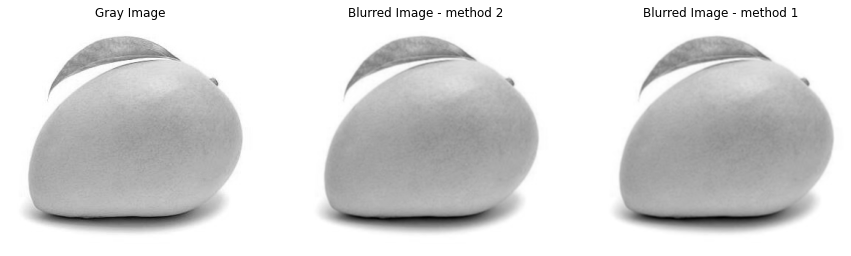

In [62]:
# Pre-process step - 2: blur the image using guassian filter , as blurring remove some of the noise.

from scipy import signal

# either define the filter to perform blurring effect
def gaussian_kernel(size, sigma=1.4):
    size = int(size)//2               # to convert the range into interger range
    x, y = np.mgrid[-size:size+1, -size:size+1]
    normal = 1 / (2.0 * np.pi * sigma**2)
    g = np.exp(-((x**2 + y**2) / (2.0 * sigma**2))) * normal
    return g

k = gaussian_kernel(3)
gausBlur1 = signal.convolve2d(GrayImage, k, boundary='symm', mode='same')

# Alteratively Use open CV library 
gausBlur2 = cv2.GaussianBlur(GrayImage, (3,3), 0)


fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)
ax1 = fig.add_subplot(1,3,1)
ax1.imshow(GrayImage, cmap = 'gray')
ax1.set_title("Gray Image")
ax1.set_axis_off()
ax2 = fig.add_subplot(1,3,2)
ax2.imshow(gausBlur2, cmap ='gray')
ax2.set_title("Blurred Image - method 2")
ax2.set_axis_off()
ax3 = fig.add_subplot(1,3,3)
ax3.imshow(np.absolute(gausBlur1), cmap ='gray')
ax3.set_title("Blurred Image - method 1")
ax3.set_axis_off()

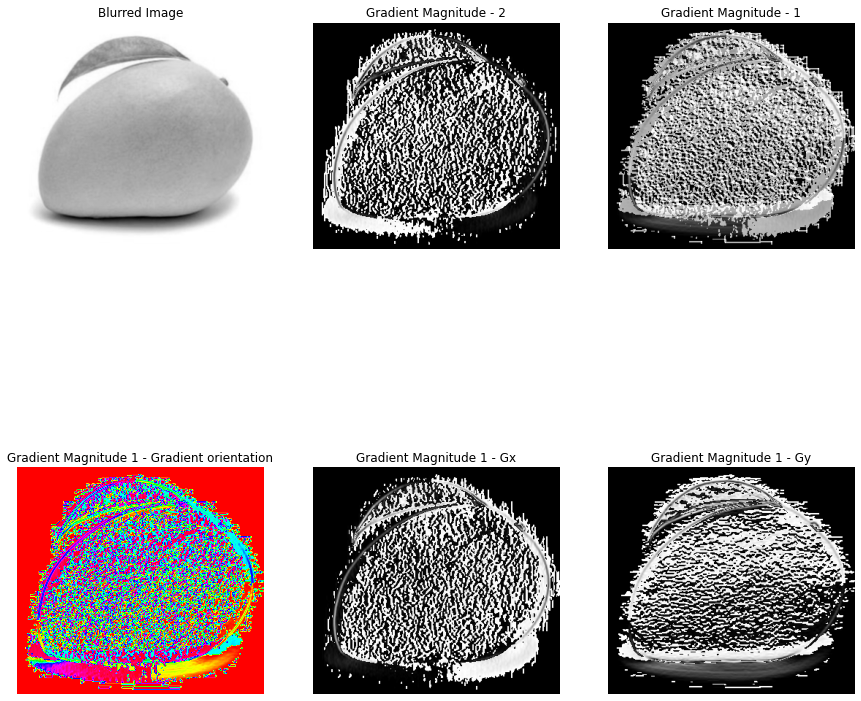

In [60]:
# Pre-process step -3: Apply sobel filter to the blurred image to get both intensity and edge direction matrices.
# Determine the intensity gradients

from scipy import ndimage

def sobel_filters(img):
    Kx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], np.float32)
    Ky = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], np.float32)
    
    Ix = ndimage.filters.convolve(img, Kx)
    Iy = ndimage.filters.convolve(img, Ky)
    
    G = np.hypot(Ix, Iy)
    G = G / G.max() * 255
    theta = np.arctan2(Iy, Ix)
    
    return (G, theta, Ix, Iy)

GradientMag1 = sobel_filters(gausBlur2)
#print(GradientMag1[0].shape)

# Alteratively Use open CV library 
GradientMag2 = ndimage.sobel(gausBlur2)

fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)
ax1 = fig.add_subplot(2,3,1)
ax1.imshow(gausBlur2, cmap = 'gray')
ax1.set_title("Blurred Image")
ax1.set_axis_off()
ax2 = fig.add_subplot(2,3,2)
ax2.imshow(np.absolute(GradientMag2), cmap = 'gray')
ax2.set_title("Gradient Magnitude - 2")
ax2.set_axis_off()
#ax3 = fig.add_subplot(2,4,3)
#ax3.imshow(np.angle(GradientMag2), cmap = 'hsv')
#ax3.set_title("Gradient Magnitude 2 - Gradient orientation")
#ax3.set_axis_off()


ax3 = fig.add_subplot(2,3,3)
ax3.imshow(GradientMag1[0], cmap = 'gray')
ax3.set_title("Gradient Magnitude - 1")
ax3.set_axis_off()
ax4 = fig.add_subplot(2,3,4)
ax4.imshow(GradientMag1[1], cmap = 'hsv')            # hsv is cyclic, like angles
ax4.set_title("Gradient Magnitude 1 - Gradient orientation")
ax4.set_axis_off()
ax5 = fig.add_subplot(2,3,5)
ax5.imshow(GradientMag1[2], cmap = 'gray')
ax5.set_title("Gradient Magnitude 1 - Gx")
ax5.set_axis_off()
ax6 = fig.add_subplot(2,3,6)
ax6.imshow(GradientMag1[3], cmap = 'gray')
ax6.set_title("Gradient Magnitude 1 - Gy")
ax6.set_axis_off()

In [ ]:
# Pre-process step -4: Non-Maximan Suppression - this step thin out the edges

def non_max_suppression(img, D):
    M, N = img.shape
    Z = np.zeros((M,N), dtype=np.int32)
    angle = D * 180. / np.pi
    angle[angle < 0] += 180

    
    for i in range(1,M-1):
        for j in range(1,N-1):
            try:
                q = 255
                r = 255
                
               #angle 0
                if (0 <= angle[i,j] < 22.5) or (157.5 <= angle[i,j] <= 180):
                    q = img[i, j+1]
                    r = img[i, j-1]
                #angle 45
                elif (22.5 <= angle[i,j] < 67.5):
                    q = img[i+1, j-1]
                    r = img[i-1, j+1]
                #angle 90
                elif (67.5 <= angle[i,j] < 112.5):
                    q = img[i+1, j]
                    r = img[i-1, j]
                #angle 135
                elif (112.5 <= angle[i,j] < 157.5):
                    q = img[i-1, j-1]
                    r = img[i+1, j+1]

                if (img[i,j] >= q) and (img[i,j] >= r):
                    Z[i,j] = img[i,j]
                else:
                    Z[i,j] = 0

            except IndexError as e:
                pass
    
    return Z